In [2]:
import os
import sys

import torch
from torch import nn, optim
from torch.nn import functional as FeatureAlphaDropout
import torch.nn as nn
sys.path.append(os.path.realpath('../'))
import numpy as np
import pickle as pkl

from torch.utils.data import DataLoader
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

/home/waluigi/miniconda3/envs/pytorch38/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
images = [f"../data/JAAD/images/video_0005/000{i + 46}.png" for i in range(15)]
yolo = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


dataloader = DataLoader(images, num_workers=1)
print(len(images))

Using cache found in /home/waluigi/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-11-4 Python-3.10.6 torch-1.13.0 CUDA:0 (NVIDIA GeForce RTX 3090, 24246MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


15


In [1]:
%time
results = yolo(images)
data = []
avg_people_detected = 0
for j in range(len(results.pandas().xyxy)):
    df = results.pandas().xyxy[j]
    bounding_boxes_pedestrians = df.loc[df['class'] == 0]
    avg_people_detected += len(bounding_boxes_pedestrians)
    # TODO: FOR NOW, break statement exists so it only predicts one person... This will need to change
    for i, row in bounding_boxes_pedestrians.iterrows():
        data.append([row['xmin'], row['ymin'], row['xmax'], row['ymax']])
data = np.array(data)
print(f"Average people detected: {avg_people_detected / len(results.pandas().xyxy)}")
# data.shape

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.38 µs


NameError: name 'yolo' is not defined

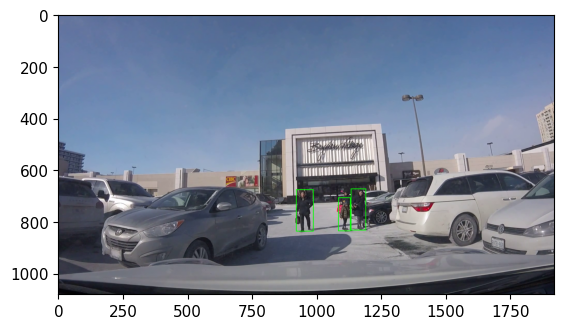

In [7]:
cv_image = cv2.imread(f"../data/JAAD/images/video_0005/00061.png")

x, y, w, h = int(data[-1][0]), int(data[-1][1]), int(data[-1][2]), int(data[-1][3])
cv2.rectangle(cv_image, (x, y), (w, h), (0, 255, 0), 2)
x, y, w, h = int(data[-2][0]), int(data[-2][1]), int(data[-2][2]), int(data[-2][3])
cv2.rectangle(cv_image, (x, y), (w, h), (0, 255, 0), 2)
x, y, w, h = int(data[-3][0]), int(data[-3][1]), int(data[-3][2]), int(data[-3][3])
cv2.rectangle(cv_image, (x, y), (w, h), (0, 255, 0), 2)

RGB_img = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

In [8]:
HOGCV = cv2.HOGDescriptor()
HOGCV.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.86 µs


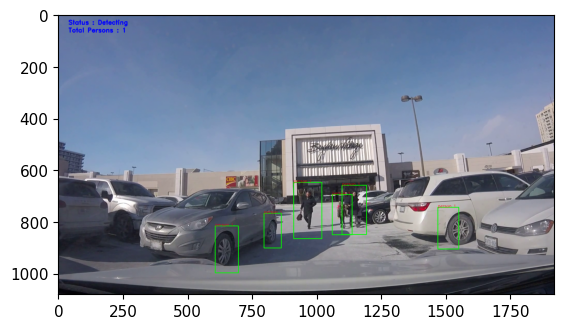

In [9]:
%time
image = cv2.imread(images[0])
bounding_box_coordinates, weights =  HOGCV.detectMultiScale(image)
for x,y,w,h in bounding_box_coordinates:
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)
    cv2.putText(image, f'person 1', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)
    
    cv2.putText(image, 'Status : Detecting ', (40,40), cv2.FONT_HERSHEY_DUPLEX, 0.8, (255,0,0), 2)
    cv2.putText(image, f'Total Persons : 1', (40,70), cv2.FONT_HERSHEY_DUPLEX, 0.8, (255,0,0), 2)
RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()